# Creación de modelos de clasificación

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print "La matriz de confusión es "
    print confusion_matrix

    print 'Precisión:', accuracy_score(y_true, y_pred)
    print 'Exactitud:', precision_score(y_true, y_pred)
    print 'Exhaustividad:', recall_score(y_true, y_pred)
    print 'F1:', f1_score(y_true, y_pred)

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print 'AUC:', auc(false_positive_rate, recall)

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)

# Creación de modelos de clasificación
El conjunto de datos son datos utilizados para la aprobación de crédito y se pueden descargar del repositorio de Universidad de California en Irvine. [Credit Approval Data Set](http://archive.ics.uci.edu/ml/datasets/Credit+Approval)

In [3]:
import pandas as pd

credit_approval = pd.read_csv('crx_data.txt', sep = ',')
credit_approval.head(n=10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


## Eliminación de los campos nulos.

En este conjunto de datos existen registros en los algunas variables no se han registrado. En este caso procedemos a la eliminación de los registros.

In [4]:
mask            = credit_approval.applymap(lambda x: x in ['?'])
credit_not_null = credit_approval[-mask.any(axis=1)]

# Creación de modelos basados en variables binarias

Las variables binarias se pueden extraer mediante `get_dummies` de `pandas`

In [5]:
dum_var = pd.get_dummies(credit_not_null['A6'])
dum_var.head(10)

,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [6]:
from sklearn.linear_model.logistic import LogisticRegression

# Creación de modelos basados en variables binarias
var_categoricas = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A11', 'A12', 'A13']
var_numericas   = ['A2', 'A3', 'A8', 'A14', 'A15']
var_target      = credit_not_null['A16'] == '+'

for v_cat in var_categoricas:
    dum_var    = pd.get_dummies(credit_not_null[v_cat])
    classifier = LogisticRegression().fit(dum_var, var_target)
    y_pred     = classifier.predict(dum_var)
    
    print v_cat
    print 'Precisión:', accuracy_score(y_pred, var_target)
    print 'Exactitud:', precision_score(y_pred, var_target)
    print 'Exhaustividad:', recall_score(y_pred, var_target)

A1
Precisión: 0.546707503828
Exactitud: 0
Exhaustividad: 0
A4
Precisión: 0.549770290965
Exactitud: 0.00675675675676
Exhaustividad: 1.0
A5
Precisión: 0.549770290965
Exactitud: 0.00675675675676
Exhaustividad: 1.0
A6
Precisión: 0.658499234303
Exactitud: 0.530405405405
Exhaustividad: 0.651452282158
A7
Precisión: 0.609494640123
Exactitud: 0.314189189189
Exhaustividad: 0.641379310345
A9
Precisión: 0.863705972435
Exactitud: 0.939189189189
Exhaustividad: 0.796561604585
A10
Precisión: 0.728943338438
Exactitud: 0.685810810811
Exhaustividad: 0.707317073171
A11
Precisión: 0.742725880551
Exactitud: 0.513513513514
Exhaustividad: 0.863636363636
A12
Precisión: 0.546707503828
Exactitud: 0
Exhaustividad: 0
A13
Precisión: 0.546707503828
Exactitud: 0
Exhaustividad: 0


/Users/daniel/anaconda/lib/python2.7/site-packages/sklearn/metrics/metrics.py:1773: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


La matriz de confusión es 
[[286  18]
 [ 71 278]]
Precisión: 0.863705972435
Exactitud: 0.939189189189
Exhaustividad: 0.796561604585
F1: 0.862015503876
AUC: 0.868675539134


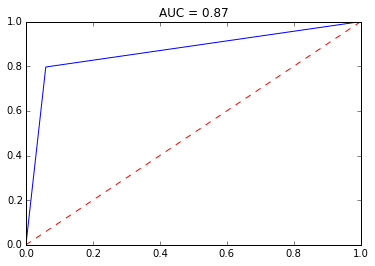

In [7]:
data_model = concatenate((pd.get_dummies(credit_not_null['A9']),
                          pd.get_dummies(credit_not_null['A10']),
                          pd.get_dummies(credit_not_null['A11'])), axis = 1)

classifier = LogisticRegression().fit(data_model, var_target)
y_pred     = classifier.predict(data_model)

metricas_modelos(y_pred, var_target)

La matriz de confusión es 
[[290  19]
 [ 67 277]]
Precisión: 0.868300153139
Exactitud: 0.935810810811
Exhaustividad: 0.80523255814
F1: 0.865625
AUC: 0.8718719425


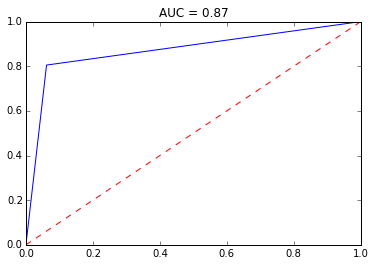

In [8]:
data_model = concatenate((pd.get_dummies(credit_not_null['A6']),
                          pd.get_dummies(credit_not_null['A9']),
                          pd.get_dummies(credit_not_null['A10']),
                          pd.get_dummies(credit_not_null['A11'])), axis = 1)

classifier = LogisticRegression().fit(data_model, var_target)
y_pred     = classifier.predict(data_model)

metricas_modelos(y_pred, var_target)